## Import needed libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


import warnings
warnings.filterwarnings('ignore')

## Read the dataset sheets

In [26]:
url = "D:\Microsoft sc/E-commerce_data.xlsx"

In [27]:
# Read all sheets
sheets = pd.read_excel(url, sheet_name = ['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants'])
sheets

{'customers':      customer_id  join_date  city_id  gender_id
 0              1 2022-01-08        7          1
 1              2 2023-05-02       20          2
 2              3 2023-05-14       15          1
 3              4 2022-11-25       11          2
 4              5 2023-04-26        8          1
 ..           ...        ...      ...        ...
 995          996 2022-10-28        3          1
 996          997 2022-07-07       20          2
 997          998 2024-03-09       11          2
 998          999 2022-07-16        6          1
 999         1000 2024-04-08        2          2
 
 [1000 rows x 4 columns],
 'genders':    gender_id gender_name
 0          1        Male
 1          2      Female,
 'cities':     city_id            city_name
 0         1                Cairo
 1         2           Alexandria
 2         3                 Giza
 3         4     Shubra El-Kheima
 4         5            Port Said
 5         6                 Suez
 6         7             Mansoura

In [28]:
# Access each DataFrame
customers_df = sheets['customers']
transactions_df = sheets['transactions']
genders_df = sheets['genders']
cities_df = sheets['cities']
branches_df = sheets['branches']
merchants_df = sheets['merchants']

## Merge Tables

In [29]:
# Merge tables using left join
# Customers and genders
customers_gender = pd.merge(customers_df, genders_df, on='gender_id', how='left')

# Add cities table
customers_details = pd.merge(customers_gender, cities_df, on='city_id', how='left')

# Add transactions table
customers_trans = pd.merge(transactions_df,customers_details, on='customer_id', how='left')

# Add branches table
customers_branch = pd.merge(customers_trans,branches_df, on='branch_id', how='left')

# Finally, add merchants table
data = pd.merge(customers_branch,merchants_df, on='merchant_id', how='left')

In [30]:
data

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Male,Fayyum,11,"Smith, Lawson and Hernandez"
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Female,Port Said,18,Lewis LLC
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Female,Asyut,18,Lewis LLC
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Female,Port Said,7,Berry-Anderson


In [31]:
data.shape

(5000, 14)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   join_date           5000 non-null   datetime64[ns]
 8   city_id             5000 non-null   int64         
 9   gender_id           5000 non-null   int64         
 10  gender_name         5000 non-null   object        
 11  city_name           5000 non-null   object        
 12  merchant_id         5000 non-null   int64         
 13  merchant_name       5000 non-null   object      

In [33]:
data.duplicated().sum()

0

In [34]:
data.isnull().sum()

transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
join_date                0
city_id                  0
gender_id                0
gender_name              0
city_name                0
merchant_id              0
merchant_name            0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   join_date           5000 non-null   datetime64[ns]
 8   city_id             5000 non-null   int64         
 9   gender_id           5000 non-null   int64         
 10  gender_name         5000 non-null   object        
 11  city_name           5000 non-null   object        
 12  merchant_id         5000 non-null   int64         
 13  merchant_name       5000 non-null   object      

In [36]:
customers= customers_df['customer_id'].nunique()
customers

1000

In [37]:
transactions= transactions_df['transaction_id'].nunique()
transactions

5000

In [38]:
print(f"number of transactions per cusotmer: {transactions / customers:.2f}")

number of transactions per cusotmer: 5.00


# Features Engineering

## Aggregation

In [39]:
# Calculate the recency of purchase for each customer
max_date = data['transaction_date'].max()
data['Recency'] = max_date - data.groupby('customer_id')['transaction_date'].transform('max')

In [40]:
data['Recency']

0       64 days
1       75 days
2      104 days
3       39 days
4      483 days
         ...   
4995    72 days
4996    17 days
4997    39 days
4998    70 days
4999   175 days
Name: Recency, Length: 5000, dtype: timedelta64[ns]

In [41]:
# Convert to the number of days
data['Recency'] = data['Recency'].dt.days 

In [42]:
data['Recency']

0        64
1        75
2       104
3        39
4       483
       ... 
4995     72
4996     17
4997     39
4998     70
4999    175
Name: Recency, Length: 5000, dtype: int64

In [43]:
# Calculate the transaction frequency for each customer
data['TransactionFrequency'] = data.groupby('customer_id')['transaction_date'].transform('nunique')

In [44]:
data['TransactionFrequency']

0        7
1        7
2        3
3        5
4        7
        ..
4995    12
4996     5
4997     8
4998     7
4999     7
Name: TransactionFrequency, Length: 5000, dtype: int64

In [45]:
# 
data['CityFrequency'] = data.groupby(['customer_id', 'city_name'])['transaction_id'].transform('count')

In [46]:
#
data['MerchantFrequency'] = data.groupby(['customer_id', 'merchant_name'])['transaction_id'].transform('count')

In [47]:
# Total Subscribed
data['TotalSubscribed'] = data.groupby('customer_id')['transaction_status'].transform(lambda x: (x == 'subscribed').count())

# Total Burned
data['TotalBurned'] = data.groupby('customer_id')['transaction_status'].transform(lambda x: (x == 'burned').count())

In [48]:
data['BurnRate'] = data['TotalBurned'] / (data['TotalSubscribed'] + 1)  # Adding 1 to avoid division by zero

In [49]:
data

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,...,city_name,merchant_id,merchant_name,Recency,TransactionFrequency,CityFrequency,MerchantFrequency,TotalSubscribed,TotalBurned,BurnRate
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,...,Aswan,7,Berry-Anderson,64,7,7,2,7,7,0.875000
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,...,Damietta,9,"Campbell, Shaffer and Martinez",75,7,7,1,7,7,0.875000
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,...,Alexandria,7,Berry-Anderson,104,3,3,1,3,3,0.750000
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,...,Aswan,18,Lewis LLC,39,5,5,2,5,5,0.833333
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,...,Damietta,15,Butler-Gomez,483,7,7,3,7,7,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,...,Fayyum,11,"Smith, Lawson and Hernandez",72,12,12,2,12,12,0.923077
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,...,Port Said,18,Lewis LLC,17,5,5,1,5,5,0.833333
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,...,Asyut,18,Lewis LLC,39,8,8,1,8,8,0.888889
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,...,Port Said,7,Berry-Anderson,70,7,7,1,7,7,0.875000


In [50]:
# Group data by Customer id to obtain customer-level features
data = data.groupby('customer_id').agg({
    'Recency': 'min',                               # Minimum Recency (more recent)
    'TransactionFrequency': 'mean',                 # Average Transaction Frequency
    'BurnRate': 'mean',                             # Average Burn Rate (Burnt/Claimed)
    'MerchantFrequency': 'mean',                     # Total Merchant Interactions
    'CityFrequency': 'mean', 
    'gender_name': 'first'
}).reset_index()

In [51]:
data

,customer_id,Recency,TransactionFrequency,BurnRate,MerchantFrequency,CityFrequency,gender_name
0,1,49,6.0,0.875000,1.571429,7.0,Male
1,2,267,3.0,0.750000,1.000000,3.0,Female
2,3,9,5.0,0.833333,1.400000,5.0,Male
3,4,546,1.0,0.500000,1.000000,1.0,Female
4,5,12,4.0,0.800000,1.500000,4.0,Male
...,...,...,...,...,...,...,...
984,996,66,3.0,0.750000,1.000000,3.0,Male
985,997,173,3.0,0.750000,1.000000,3.0,Female
986,998,17,4.0,0.800000,1.500000,4.0,Female
987,999,96,4.0,0.800000,1.000000,4.0,Male


## One-Hot Encoding

- Clustering works with numerical data

In [52]:
# For gender column
encoded_data = pd.get_dummies(data, columns=['gender_name'])

In [53]:
encoded_data

,customer_id,Recency,TransactionFrequency,BurnRate,MerchantFrequency,CityFrequency,gender_name_Female,gender_name_Male
0,1,49,6.0,0.875000,1.571429,7.0,0,1
1,2,267,3.0,0.750000,1.000000,3.0,1,0
2,3,9,5.0,0.833333,1.400000,5.0,0,1
3,4,546,1.0,0.500000,1.000000,1.0,1,0
4,5,12,4.0,0.800000,1.500000,4.0,0,1
...,...,...,...,...,...,...,...,...
984,996,66,3.0,0.750000,1.000000,3.0,0,1
985,997,173,3.0,0.750000,1.000000,3.0,1,0
986,998,17,4.0,0.800000,1.500000,4.0,1,0
987,999,96,4.0,0.800000,1.000000,4.0,0,1


In [54]:
encoded_data.duplicated().sum()

0

## Feature Scaling

In [55]:
num_cols = encoded_data[['Recency', 'TransactionFrequency', 'BurnRate', 'CityFrequency']]

In [56]:
# To reduce the range of values
ss = StandardScaler()
X_scaled = ss.fit_transform(num_cols)
X_scaled = pd.DataFrame(X_scaled)

In [57]:
scaled_data = encoded_data[['gender_name_Female', 'gender_name_Male']].join(X_scaled)

In [58]:
scaled_data

,gender_name_Female,gender_name_Male,0,1,2,3
0,0,1,-0.421374,0.471030,0.764606,0.855575
1,1,0,1.192314,-0.884495,-0.597579,-0.904516
2,0,1,-0.717463,0.019188,0.310545,-0.024470
3,1,0,3.257538,-1.788179,-3.321948,-1.784562
4,0,1,-0.695256,-0.432653,-0.052705,-0.464493
...,...,...,...,...,...,...
984,0,1,-0.295536,-0.884495,-0.597579,-0.904516
985,1,0,0.496504,-0.884495,-0.597579,-0.904516
986,1,0,-0.658245,-0.432653,-0.052705,-0.464493
987,0,1,-0.073469,-0.432653,-0.052705,-0.464493


# K-means

## Inertia

In [59]:
wcss = []
for i in range (1,31):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    print('WCSS for k = {}: {:<.3f}'.format(i, kmeans.inertia_))

WCSS for k = 1: 4450.317
WCSS for k = 2: 2607.763
WCSS for k = 3: 1921.524
WCSS for k = 4: 1543.335
WCSS for k = 5: 1300.345
WCSS for k = 6: 1135.136
WCSS for k = 7: 1014.895
WCSS for k = 8: 882.808
WCSS for k = 9: 812.498
WCSS for k = 10: 747.313
WCSS for k = 11: 654.922
WCSS for k = 12: 612.981
WCSS for k = 13: 568.720
WCSS for k = 14: 536.951
WCSS for k = 15: 499.070
WCSS for k = 16: 466.845
WCSS for k = 17: 444.722
WCSS for k = 18: 416.056
WCSS for k = 19: 383.027
WCSS for k = 20: 374.297
WCSS for k = 21: 346.216
WCSS for k = 22: 327.935
WCSS for k = 23: 312.704
WCSS for k = 24: 299.357
WCSS for k = 25: 286.720
WCSS for k = 26: 273.008
WCSS for k = 27: 258.369
WCSS for k = 28: 248.793
WCSS for k = 29: 239.423
WCSS for k = 30: 232.139


### The Elbow Method

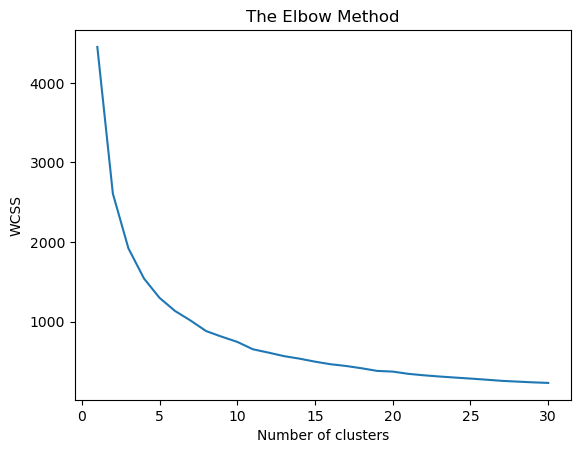

In [60]:
plt.plot(range(1,31),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Best value for k is 8

In [61]:
# Build the model
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit the model to the data
kmeans.fit(scaled_data)

KMeans(random_state=42)

In [62]:
#Prediction
pred = kmeans.predict(scaled_data)

In [63]:
# Evaluation using silhouette score
score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3639680383122121


- weak score

## PCA

In [64]:
# Reducing Dimensions to 2D
pca = PCA(n_components = 2)
X_pca2 = pca.fit_transform(scaled_data)
print(X_pca2.shape)

(989, 2)


In [65]:
wcss = []
for i in range (1,31):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans2.fit(X_pca2)
    wcss.append(kmeans2.inertia_)
    print('WCSS for k = {}: {:<.3f}'.format(i, kmeans2.inertia_))

WCSS for k = 1: 3775.101
WCSS for k = 2: 1933.567
WCSS for k = 3: 1308.104
WCSS for k = 4: 924.373
WCSS for k = 5: 760.990
WCSS for k = 6: 614.029
WCSS for k = 7: 527.531
WCSS for k = 8: 452.567
WCSS for k = 9: 414.288
WCSS for k = 10: 372.297
WCSS for k = 11: 331.115
WCSS for k = 12: 298.032
WCSS for k = 13: 260.311
WCSS for k = 14: 232.342
WCSS for k = 15: 210.979
WCSS for k = 16: 198.120
WCSS for k = 17: 176.800
WCSS for k = 18: 163.293
WCSS for k = 19: 152.012
WCSS for k = 20: 145.191
WCSS for k = 21: 132.515
WCSS for k = 22: 119.581
WCSS for k = 23: 115.595
WCSS for k = 24: 105.568
WCSS for k = 25: 101.060
WCSS for k = 26: 96.452
WCSS for k = 27: 91.401
WCSS for k = 28: 86.949
WCSS for k = 29: 80.168
WCSS for k = 30: 77.521


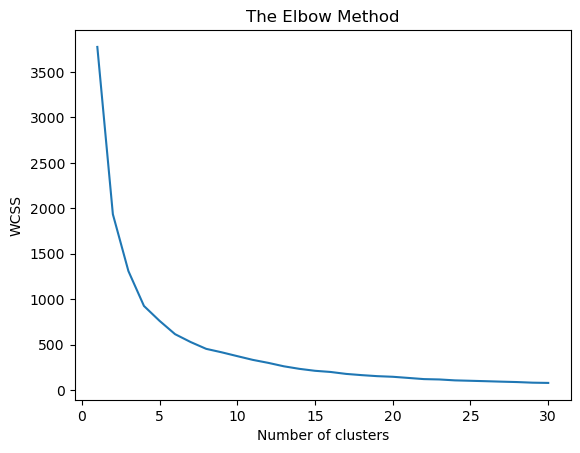

In [66]:
plt.plot(range(1,31),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
# Build the model
kmeans2 = KMeans(n_clusters= 5, random_state=42)

# Fit the model to the data
kmeans2.fit(X_pca2)

KMeans(n_clusters=5, random_state=42)

In [68]:
#Prediction
pred = kmeans2.predict(X_pca2)

In [69]:
# Check silhouette score
score = silhouette_score(X_pca2, kmeans2.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4573868566776117


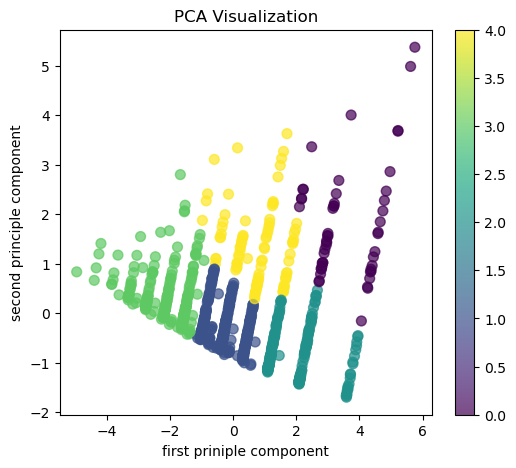

In [70]:
# Plot PCA
plt.figure(figsize=(6, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=kmeans2.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA Visualization')
plt.colorbar()
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

- Best Score

### 3D PCA 

In [178]:
# Reducing Dimensions to 3D
pca = PCA(n_components = 3)
X_pca3 = pca.fit_transform(scaled_data)
print(X_pca3.shape)

(989, 3)


In [179]:
wcss = []
for i in range (1,31):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X_pca3)
    wcss.append(kmeans.inertia_)
    print('WCSS for k = {}: {:<.3f}'.format(i, kmeans.inertia_))

WCSS for k = 1: 4270.059
WCSS for k = 2: 2427.696
WCSS for k = 3: 1798.278
WCSS for k = 4: 1415.062
WCSS for k = 5: 1173.944
WCSS for k = 6: 1031.046
WCSS for k = 7: 910.129
WCSS for k = 8: 800.091
WCSS for k = 9: 737.123
WCSS for k = 10: 657.304
WCSS for k = 11: 601.092
WCSS for k = 12: 563.290
WCSS for k = 13: 525.894
WCSS for k = 14: 486.837
WCSS for k = 15: 454.046
WCSS for k = 16: 411.851
WCSS for k = 17: 388.595
WCSS for k = 18: 367.381
WCSS for k = 19: 353.674
WCSS for k = 20: 330.723
WCSS for k = 21: 311.542
WCSS for k = 22: 297.908
WCSS for k = 23: 281.093
WCSS for k = 24: 265.298
WCSS for k = 25: 257.582
WCSS for k = 26: 240.842
WCSS for k = 27: 226.498
WCSS for k = 28: 216.139
WCSS for k = 29: 203.719
WCSS for k = 30: 199.441


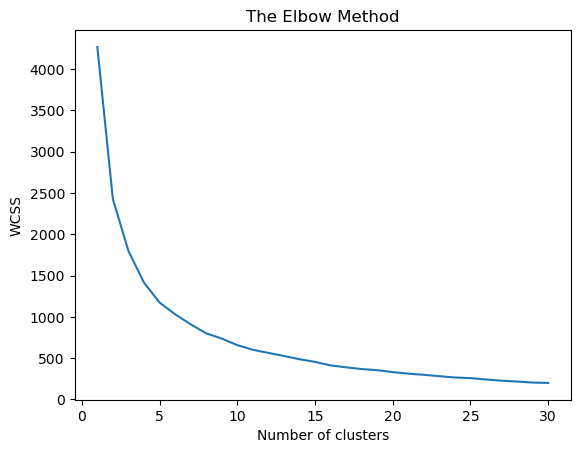

In [180]:
plt.plot(range(1,31),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [181]:
# Build the model
kmeans = KMeans(n_clusters= 10, random_state=42)

# Fit the model to the data
kmeans.fit(X_pca3)

KMeans(n_clusters=10, random_state=42)

In [182]:
#Prediction
pred = kmeans.predict(X_pca3)

In [183]:
score = silhouette_score(X_pca3, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.39800468707942127


- 2 components are more better

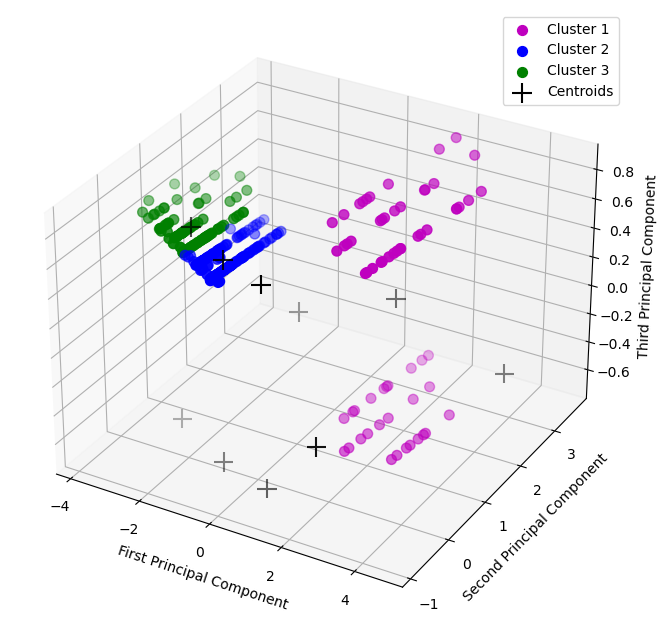

In [184]:
# Visualizing the result of 3 components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cores = ['m', 'b', 'g']  # Colours for clusters

# Loop through each cluster and plot in 3D
for i in range(len(cores)):
    ax.scatter(X_pca3[pred == i, 0], X_pca3[pred == i, 1], X_pca3[pred == i, 2], 
               s=50, c=cores[i], label='Cluster ' + str(i + 1))

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], s=200, marker='+', c='black', label='Centroids')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.legend()
plt.show()

## TSNE

- perplexity representing the number of neighbors that influence the location of a point in the low-dimensional space. 
- Tuning perplexity helps improve the quality of the projection.

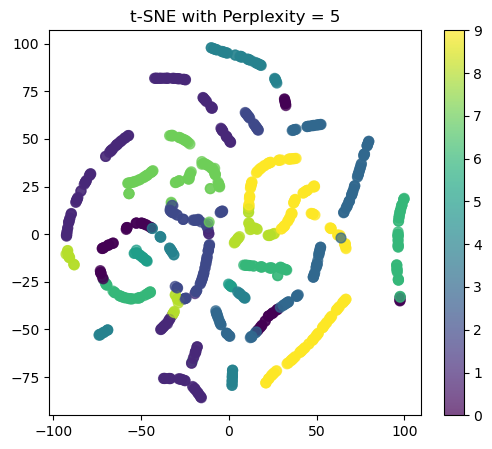

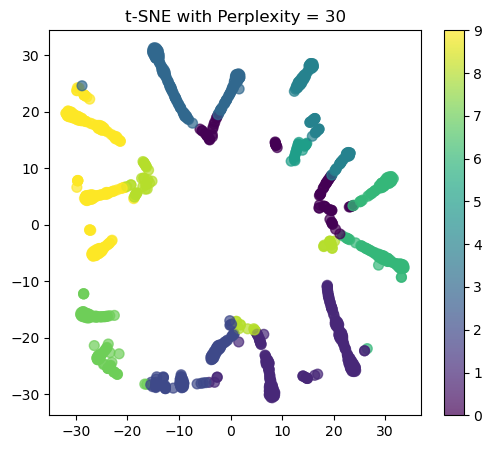

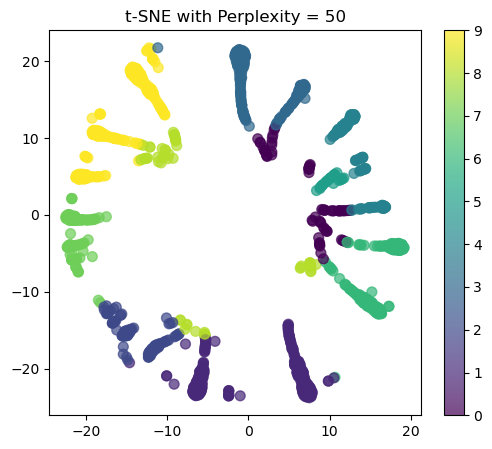

In [185]:
perplexities = [5, 30, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(scaled_data)
    
    plt.figure(figsize=(6, 5))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.colorbar()
    plt.show()


In [186]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=25, n_iter=1000, random_state=42)

# Fit and transform the data into 2D space
X_tsne = tsne.fit_transform(scaled_data)

- After many trials we notice that perplexity=25 has the best score

In [187]:
# Perform K-Means clustering on the t-SNE output
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X_tsne)

# Compute the silhouette score using the K-Means labels
score = silhouette_score(X_tsne, kmeans_labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4425732493400574


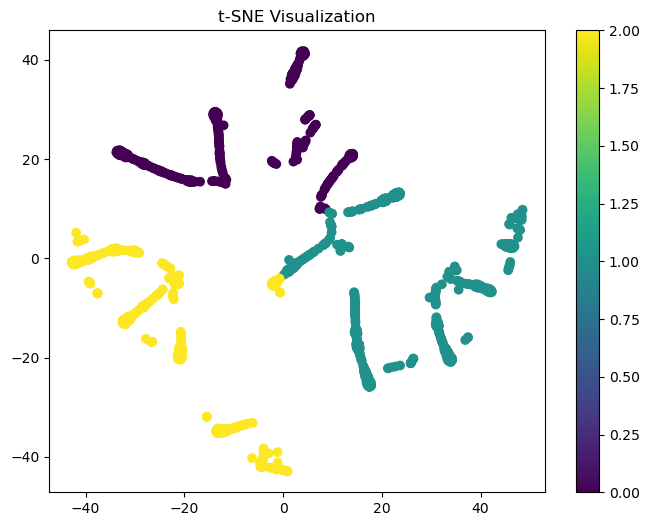

In [188]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')  # Use cluster labels if available
plt.colorbar()
plt.title('t-SNE Visualization')
plt.show()

In [189]:
# Evaluation of t-sne
trust = trustworthiness(scaled_data, X_tsne)
print(f'Trustworthiness: {trust}')

Trustworthiness: 0.9991041105576222


## DBSCAN

In [335]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10) 
dbscan_labels = dbscan.fit_predict(scaled_data)

# dbscan_labels will be -1 for noise points, and cluster numbers for other points
print(f'Cluster labels: {np.unique(dbscan_labels)}')

Cluster labels: [-1  0  1  2  3  4  5]


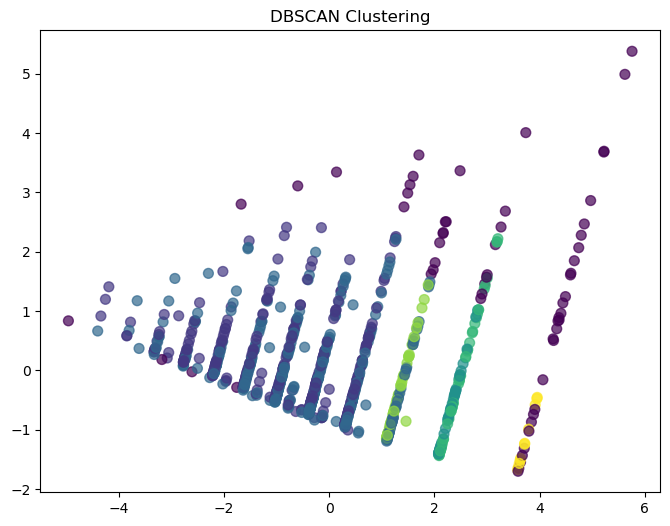

In [336]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.show()

In [337]:
n_noise = np.sum(dbscan_labels == -1)
print(f'Number of noise points: {n_noise}')


Number of noise points: 60


In [338]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters (excluding noise): {n_clusters}')

Number of clusters (excluding noise): 6


In [339]:
silhouette_avg = silhouette_score(scaled_data, dbscan_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.18476166266164623


- Very weak score.

# Gaussian Mixture

In [71]:
for k in range(2, 50):
    model = GaussianMixture(k)
    model.fit(scaled_data)
    pred = model.predict(scaled_data)
    score = silhouette_score(scaled_data, pred)
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score)) 

Silhouette Score for k = 2: -0.032
Silhouette Score for k = 3: 0.240
Silhouette Score for k = 4: 0.241
Silhouette Score for k = 5: 0.014
Silhouette Score for k = 6: 0.227
Silhouette Score for k = 7: 0.243
Silhouette Score for k = 8: 0.274
Silhouette Score for k = 9: 0.283
Silhouette Score for k = 10: 0.292
Silhouette Score for k = 11: 0.258
Silhouette Score for k = 12: 0.202
Silhouette Score for k = 13: 0.157
Silhouette Score for k = 14: 0.273
Silhouette Score for k = 15: 0.272
Silhouette Score for k = 16: 0.141
Silhouette Score for k = 17: 0.193
Silhouette Score for k = 18: 0.276
Silhouette Score for k = 19: 0.149
Silhouette Score for k = 20: 0.237
Silhouette Score for k = 21: 0.241
Silhouette Score for k = 22: 0.225
Silhouette Score for k = 23: 0.182
Silhouette Score for k = 24: 0.167
Silhouette Score for k = 25: 0.209
Silhouette Score for k = 26: 0.225
Silhouette Score for k = 27: 0.219
Silhouette Score for k = 28: 0.235
Silhouette Score for k = 29: 0.260
Silhouette Score for k = 30

- K = 9 has the highest score

Text(0.5, 0, 'Number of Clusters')

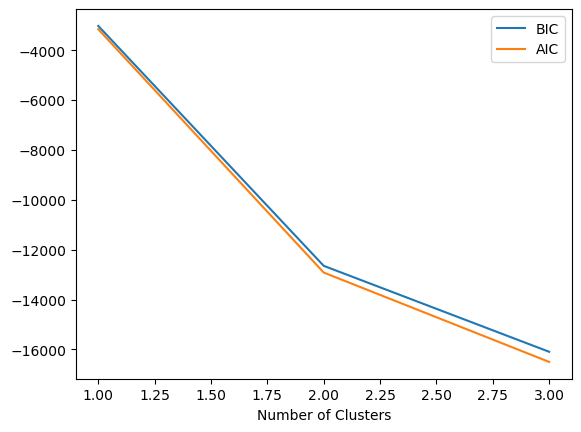

In [72]:
n_components = np.arange(1, 4)

models = [GaussianMixture(n_components=n, random_state=1502).fit(scaled_data) for n in n_components]

plt.plot(n_components, [m.bic(scaled_data) for m in models], label="BIC")
plt.plot(n_components, [m.aic(scaled_data) for m in models], label="AIC")
plt.legend()
plt.xlabel("Number of Clusters")

In [73]:
model = GaussianMixture(n_components= 8, random_state=1502).fit(scaled_data)
labels = model.predict(scaled_data)

In [74]:
score_g = silhouette_score(scaled_data,labels)
print("Score of Gaussian = ", score_g)

Score of Gaussian =  0.3022727751836484


- Weak score

## Hierarchical Clustering

In [77]:
# Hierarchical clustering using AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 2, distance_threshold=None, linkage='ward')
clusters = model.fit_predict(X_pca2)

# Linkage matrix for dendrogram
linkage_matrix = linkage(X_pca2, method='ward')


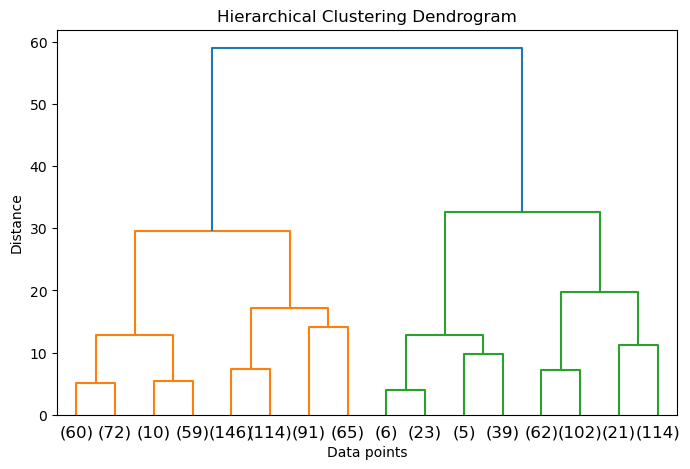

In [78]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

### K-means with 2D PCA

-  Best score

In [79]:
# Final Model
data["Cluster"] = kmeans2.labels_
data.groupby('Cluster').agg({
    'Recency':'mean',
    'TransactionFrequency':'mean',
    'BurnRate':'mean',
    'CityFrequency':'mean',
    'gender_name':['first', 'count']}).round(2)

Recency TransactionFrequency BurnRate CityFrequency gender_name      
           mean                 mean     mean          mean       first count
Cluster                                                                      
0        475.02                 1.71     0.61          1.71      Female    51
1         53.72                 4.92     0.83          5.03        Male   426
2         78.62                 2.37     0.69          2.37        Male   182
3         59.54                 7.99     0.89          8.18        Male   236
4        311.57                 4.32     0.81          4.33      Female    94

- 5 clusters

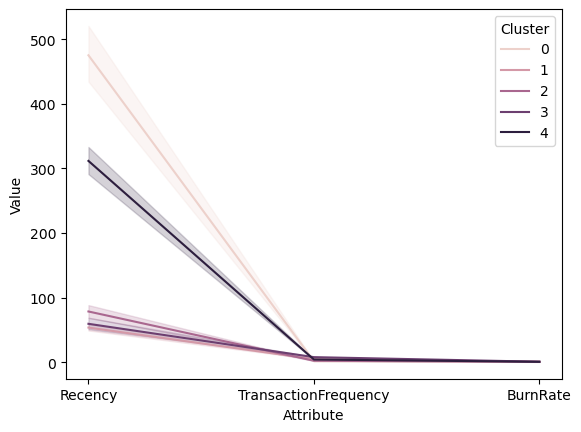

In [81]:
# Visualising the Cluster Chartecteristics

data_normalized = pd.DataFrame(data, columns=['Recency', 'TransactionFrequency','BurnRate'])
data_normalized['ID'] = data.index
data_normalized['Cluster'] = kmeans2.labels_
data_nor_melt = pd.melt(data_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency', 'TransactionFrequency','BurnRate'],
                      var_name='Attribute',
                      value_name='Value')
data_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=data_nor_melt)
plt.show()


### Segment Analysis:
   - Cluster 0: Low Engagement Female Segment.
   - Cluster 1: High Transaction Male Segment.
   - Cluster 2: Moderate Engagement Male Segment.
   - Cluster 3: High Burn Rate and Frequent Shopper Male Segment.
   - Cluster 4: Low Engagement but Frequent Female Segment.
### Recommendations
  - Focus on Cluster 1 and 3 for premium loyalty programs, as they represent high-engagement customers who are likely to respond positively to exclusive deals.
  - Re-engage Clusters 0 and 4 through personalized campaigns, focusing on their previous high coupon usage or transaction frequency but recent inactivity.
  - Encourage increased engagement in Cluster 2 by offering tailored promotions and location-specific discounts.
